In [1]:
import json
import pandas as pd
import numpy as np
from argparse import Namespace
from collections import Counter
import pickle
import os
import urllib
import networkx as nx

## Venezia

### Directly Import Graph Structure Data
Skip the next sections to "Construction and Analysis on Graphs"

In [5]:
All_Edges_Graph = pd.read_csv('dataset/Venice/Edge_List.csv', sep='\t', index_col='Unnamed: 0')

In [11]:
All_Edges_Graph

0            1  Week_0  Week_1  dist  Temporal_Similarity  \
1        51870743082  51871789478  202140  202140     0                  1.0   
2        51870743082  51870742942  202140  202140     0                  1.0   
8        51870743082  51858312666  202140  202139     1                  0.5   
12       51870743082  51855730156  202140  202139     1                  0.5   
28       51870743082  51847785831  202140  202139     1                  0.5   
...              ...          ...     ...     ...   ...                  ...   
8708395  51233434888  51233431343  202120  202120     0                  1.0   
8708396  51233434888  51233430558  202120  202120     0                  1.0   
8708397  51233434888  51234286630  202120  202120     0                  1.0   
8708398  51233434888  51234294135  202120  202120     0                  1.0   
8708399  51233434888  51234291635  202120  202120     0                  1.0   

               User_0         User_1  relationship  Social_Similarity  \
1        47954272@N06   47954272@N06             3                1.0   
2        47954272@N06   47954272@N06             3                1.0   
8        47954272@N06  123016824@N05             0                0.0   
12       47954272@N06  123016824@N05             0                0.0   
28       47954272@N06  123016824@N05             0                0.0   
...               ...            ...           ...                ...   
8708395  83293103@N00   83293103@N00             3                1.0   
8708396  83293103@N00   83293103@N00             3                1.0   
8708397  83293103@N00   83293103@N00             3                1.0   
8708398  83293103@N00   83293103@N00             3                1.0   
8708399  83293103@N00   83293103@N00             3                1.0   

              GEO_0       GEO_1  geo_distance  Spatial_Similarity  One_Edge  \
1        7636418620  7636418620           0.0               1.000      True   
2        7636418620  1851468091          24.0               0.000      True   
8        7636418620   245128972         156.1               0.000      True   
12       7636418620  3549647041         187.8               0.000      True   
28       7636418620   271996905         153.6               0.000      True   
...             ...         ...           ...                 ...       ...   
8708395   944189412   944189125           7.2               0.640      True   
8708396   944189412   944189018           5.3               0.735      True   
8708397   944189412  4878955710          11.6               0.420      True   
8708398   944189412  4919658949          11.9               0.405      True   
8708399   944189412   944189121           5.7               0.715      True   

         Same_Node  
1            False  
2            False  
8            False  
12           False  
28           False  
...            ...  
8708395      False  
8708396      False  
8708397      False  
8708398      False  
8708399      False  

[1069026 rows x 16 columns]

### Importing Useful Data

In [155]:
GEO_metadata = pd.read_csv('Venezia/data_storage/GEO_metadata.csv', sep='\t', index_col='Unnamed: 0')

In [89]:
metadata = pd.read_csv('Venezia/data_storage/metadata.csv', sep='\t', index_col='Unnamed: 0')

In [3]:
GEO_metadata.columns

Index(['y', 'x', 'street_count', 'pr', 'bc', 'dg', 'cl', 'highway', 'geometry',
       'index', 'index.1', 'candownload', 'url_c', 'url_q', 'url_n',
       'url_largest', 'owner', 'owner_loc', 'title', 'description', 'comments',
       'taken', 'views', 'people', 'tags', 'lat', 'lon', 'neighbourhood',
       'url', 'local', 'tag_list', 'tag_len', 'NOT', 'year', 'time', 'week',
       'unique_week', 'English', 'Italian', 'Other_Lang', 'num_sent',
       'revised_text', 'text_data', 'text_len', 'GEO_node', 'posts_num',
       'week_adjust', 'adjusted_week'],
      dtype='object')

In [4]:
GEO_metadata

y          x  street_count        pr        bc        dg  \
0     45.438441  12.318212             1  0.000037  0.000000  0.000342   
1     45.438441  12.318212             1  0.000037  0.000000  0.000342   
2     45.438593  12.319690             3  0.000184  0.148785  0.001026   
3     45.433906  12.339224             1  0.000036  0.000000  0.000342   
4     45.433735  12.341083             1  0.000076  0.000000  0.000342   
...         ...        ...           ...       ...       ...       ...   
2946  45.428771  12.358048             1  0.000068  0.000000  0.000342   
2947  45.429066  12.357287             4  0.000395  0.010852  0.001368   
2948  45.428308  12.357812             1  0.000092  0.000000  0.000342   
2949  45.429491  12.358138             3  0.000303  0.002035  0.001026   
2950  45.429175  12.358780             3  0.000250  0.000681  0.001026   

            cl highway                       geometry  index  ...  \
0     0.005362     NaN  POINT (12.3182119 45.4384412)      3  ...   
1     0.005362     NaN  POINT (12.3182119 45.4384412)      4  ...   
2     0.005742     NaN  POINT (12.3196901 45.4385928)      5  ...   
3     0.004988     NaN  POINT (12.3392244 45.4339065)      6  ...   
4     0.005158     NaN  POINT (12.3410825 45.4337352)     13  ...   
...        ...     ...                            ...    ...  ...   
2946  0.003517     NaN   POINT (12.3580476 45.428771)   4981  ...   
2947  0.003662     NaN  POINT (12.3572867 45.4290662)   4982  ...   
2948  0.003557     NaN  POINT (12.3578118 45.4283075)   4983  ...   
2949  0.003585     NaN  POINT (12.3581381 45.4294908)   4984  ...   
2950  0.003514     NaN  POINT (12.3587801 45.4291749)   4985  ...   

      unique_week  English Italian Other_Lang num_sent  \
0          202140      1.0     0.0        0.0      1.0   
1          202140      1.0     0.0        0.0      1.0   
2          202140      1.0     0.0        0.0      1.0   
3          201909      1.0     1.0        1.0      9.0   
4          202203      0.0     1.0        0.0     10.0   
...           ...      ...     ...        ...      ...   
2946       202120      0.0     1.0        0.0      1.0   
2947       202120      0.0     1.0        0.0      1.0   
2948       202120      0.0     1.0        0.0      1.0   
2949       202120      0.0     1.0        0.0      1.0   
2950       202120      0.0     1.0        0.0      1.0   

                                           revised_text  \
0     It has tags of adriaticsea, italy, venice, bri...   
1             It has tags of adriaticsea, italy, venice   
2      It has tags of adriaticsea, italy, venice, water   
3     THE KNIGHT WITH A GRIM LOOK   The Carnival of ...   
4     Bridge of Sighs. The Bridge of Sighs was built...   
...                                                 ...   
2946  It has tags of biennale, architecture, archite...   
2947  It has tags of biennale, architecture, archite...   
2948  It has tags of biennale, architecture, archite...   
2949  It has tags of biennale, architecture, archite...   
2950  It has tags of biennale, architecture, archite...   

                                              text_data text_len    GEO_node  \
0     Venice, Italy. It has title of .... It has tag...      9.0  7636418620   
1     Venice, Italy. It has title of .... It has tag...      7.0  7636418620   
2     Venice, Italy. It has title of .... It has tag...      8.0  1851468091   
3     IL CAVALIERE DALLO SGUARDO TORVO\n\n\nIl Carne...    222.0  7887753052   
4     Ponte dei Sospiri. Il ponte dei Sospiri fu rea...    184.0  4437784469   
...                                                 ...      ...         ...   
2946  . It has title of 20210520_145859. It has tags...      9.0   944189018   
2947  . It has title of 20210520_145745. It has tags...      9.0  4878955710   
2948  . It has title of 20210520_164727. It has tags...      9.0  4919658949   
2949  . It has title of 20210520_155646. It has tags...      9.0   944189121   
2950  . It

In [552]:
GEO_metadata[GEO_metadata['index.1']==51337278527]

y          x  street_count        pr        bc        dg  \
695  45.434209  12.323623             3  0.000219  0.008056  0.001026   

           cl highway                       geometry  index  ...  Italian  \
695  0.005571     NaN  POINT (12.3236233 45.4342088)   1169  ...      1.0   

     Other_Lang num_sent                                       revised_text  \
695         0.0      9.0  The two story brick building is unusual for st...   

                                             text_data text_len    GEO_node  \
695  The two story brick building is unusual for st...    204.0  3403782580   

    posts_num week_adjust adjusted_week  
695         5           0        202130  

[1 rows x 48 columns]

In [2]:
GEO_nodes = pd.read_csv('Venezia/data_storage/GEO_nodes.csv', sep='\t').set_index('osmid')
GEO_nodes

y          x  street_count        pr        bc        dg  \
osmid                                                                          
27178184    45.438197  12.335686             4  0.000197  0.208517  0.001368   
764403528   45.438128  12.335605             3  0.000175  0.025767  0.001026   
1675825096  45.438233  12.335728             3  0.000186  0.048636  0.001026   
8670969688  45.438255  12.335601             3  0.000111  0.207535  0.001026   
5395065019  45.438053  12.335932             4  0.000236  0.196443  0.001368   
...               ...        ...           ...       ...       ...       ...   
9196476006  45.441902  12.307559             3  0.000119  0.000691  0.001026   
9196521176  45.438670  12.326683             1  0.000077  0.000000  0.000342   
9221655954  45.467211  12.279144             1  0.000030  0.000000  0.000342   
9379177140  45.432392  12.331032             1  0.000073  0.000000  0.000342   
9439079311  45.445912  12.317267             1  0.000130  0.000000  0.000342   

                  cl highway                       geometry  
osmid                                                        
27178184    0.005999     NaN  POINT (12.3356863 45.4381974)  
764403528   0.005985     NaN  POINT (12.3356054 45.4381284)  
1675825096  0.005990     NaN  POINT (12.3357281 45.4382329)  
8670969688  0.005998     NaN  POINT (12.3356013 45.4382549)  
5395065019  0.006001     NaN  POINT (12.3359319 45.4380532)  
...              ...     ...                            ...  
9196476006  0.004071     NaN  POINT (12.3075592 45.4419018)  
9196521176  0.005886     NaN   POINT (12.326683 45.4386701)  
9221655954  0.001992     NaN   POINT (12.2791441 45.467211)  
9379177140  0.005220     NaN  POINT (12.3310316 45.4323915)  
9439079311  0.004516     NaN  POINT (12.3172675 45.4459124)  

[5848 rows x 9 columns]

In [79]:
def check_last_week(line):
    if line['week']>50:
        if line['taken'][5:7] == '01':
            return int(-100)
    return int(0)

In [80]:
GEO_metadata['week_adjust'] = GEO_metadata.apply(lambda x: check_last_week(x),axis=1)

In [91]:
metadata['week_adjust'] = metadata.apply(lambda x: check_last_week(x),axis=1)

In [92]:
GEO_metadata['adjusted_week'] = (GEO_metadata['unique_week'].astype(int) + GEO_metadata['week_adjust']).astype(str)

In [92]:
metadata['adjusted_week'] = (metadata['unique_week'].astype(int) + metadata['week_adjust']).astype(str)

In [93]:
metadata[metadata.week>50][['taken','unique_week','adjusted_week','week_adjust']]

taken  unique_week adjusted_week  week_adjust
100   2021-12-29 17:24:11       202152        202152            0
109   1983-01-01 00:00:00       198352        198252         -100
182   2021-12-28 17:06:40       202152        202152            0
226   2021-12-28 08:11:15       202152        202152            0
241   2021-12-31 14:17:50       202152        202152            0
320   1971-01-01 00:00:00       197153        197053         -100
451   1971-01-01 00:00:00       197153        197053         -100
572   2010-01-01 00:00:00       201053        200953         -100
687   2019-12-22 15:32:54       201951        201951            0
688   2019-12-23 10:22:35       201952        201952            0
689   2019-12-23 13:56:11       201952        201952            0
690   2019-12-23 16:07:58       201952        201952            0
691   2019-12-23 16:23:08       201952        201952            0
856   2019-12-23 09:55:55       201952        201952            0
857   2019-12-23 16:08:10       201952        201952            0
858   2019-12-23 16:17:19       201952        201952            0
859   2019-12-23 16:21:24       201952        201952            0
860   2019-12-23 16:23:01       201952        201952            0
1539  2018-12-25 12:28:26       201852        201852            0
2243  2020-12-30 19:53:38       202053        202053            0
2244  2020-12-30 13:24:37       202053        202053            0
2250  2020-12-30 00:00:25       202053        202053            0
2365  2009-12-19 09:03:00       200951        200951            0
2380  2018-12-19 08:55:22       201851        201851            0
2451  2019-12-24 08:59:26       201952        201952            0
2501  2020-12-31 18:18:47       202053        202053            0
2503  2020-12-31 14:19:49       202053        202053            0
2508  2021-01-03 18:21:26       202153        202053         -100
2518  2021-01-01 19:09:44       202153        202053         -100
2785  2012-12-22 16:52:00       201251        201251            0
2971  2015-12-21 17:06:20       201552        201552            0
3220  2021-12-28 07:15:06       202152        202152            0
3235  2021-12-30 07:41:48       202152        202152            0
3247  1983-01-01 00:00:00       198352        198252         -100
3248  1983-01-01 00:00:00       198352        198252         -100
3289  2021-12-28 17:33:08       202152        202152            0
3294  2022-01-01 13:18:31       202252        202152         -100
3300  2021-12-28 16:41:30       202152        202152            0
3304  2021-12-28 15:14:37       202152        202152            0
3305  2021-12-28 15:57:19       202152        202152            0
3412  1971-01-01 00:00:00       197153        197053         -100
3501  2007-12-29 11:19:16       200752        200752            0
3554  2010-01-01 00:00:00       201053        200953         -100
3790  1983-01-01 00:00:00       198352        198252         -100
3812  2021-12-28 16:02:48       202152        202152            0
4031  2010-01-01 00:00:00       201053        200953         -100
4055  1983-01-01 00:00:00       198352        198252         -100
4087  2021-12-28 13:02:42       202152        202152            0
4106  1971-01-01 00:00:00       197153        197053         -100
4192  2019-12-23 16:19:24       201952        201952            0
4219  2019-12-22 15:48:50       201951        201951            0
4220  2019-12-23 12:22:40       201952        201952            0
4221  2019-12-23 16:07:54       201952        201952            0
4222  2019-12-23 16:05:36       201952        201952            0
4223  2019-12-23 16:08:05       201952        201952            0
4309  1983-01-01 00:00:00       198352        198252         -100
4310  1983-01-01 00:00:00       198352        198252         -100
4585  2019-12-24 07:39:01       201952        201952            0

In [88]:
GEO_metadata.to_csv('Venezia/data_storage/GEO_metadata.csv', sep='\t')

In [94]:
metadata.to_csv('Venezia/data_storage/metadata.csv', sep='\t')

In [156]:
social_links = pd.read_csv('Venezia/data_storage/social_links.csv', sep='\t').rename(columns={'Unnamed: 0': 'User0', 
                                                                                              'Unnamed: 1': 'User1'})

In [157]:
social_links

User0          User1  self friend  interest  mutual
0       47954272@N06   47954272@N06     1      1  1.000000    True
1       47954272@N06   64148082@N02     0  False  0.000000   False
2       47954272@N06  186704588@N07     0  False  0.000000   False
3       47954272@N06   61033692@N00     0  False  0.000000   False
4       47954272@N06   69376724@N06     0  False  0.021277   False
...              ...            ...   ...    ...       ...     ...
108895  85941441@N04  144576996@N06     0  False  0.000000   False
108896  85941441@N04  127547040@N07     0  False  0.000000   False
108897  85941441@N04   87413031@N03     0  False  0.000000   False
108898  85941441@N04  112273443@N02     0  False  0.000000   False
108899  85941441@N04   85941441@N04     1      1  1.000000    True

[108900 rows x 6 columns]

In [158]:
GEO_node_dist = pd.read_csv('Venezia/data_storage/GEO_node_dist.csv', sep='\t', index_col='Unnamed: 0')

In [159]:
GEO_node_dist

7636418620  1851468091  7887753052  4437784469  27231707  \
7636418620         0.0        24.0       206.8       213.1     179.3   
1851468091        24.0         0.0       190.0       190.6     160.3   
7887753052       206.8       190.0         0.0        43.5     117.3   
4437784469       213.1       190.6        43.5         0.0     106.1   
27231707         179.3       160.3       117.3       106.1       0.0   
...                ...         ...         ...         ...       ...   
944189412        327.8       305.3       159.4       119.1     202.9   
1327380181       366.8       373.3       563.3       563.9     528.6   
944189121        322.1       299.6       153.7       113.4     197.2   
4471751053        69.9        62.0       149.3       160.9     177.4   
271343269        178.1       155.6        53.9        71.2      88.3   

            1996193041  1863759288  245128972  3586376601  251147479  ...  \
7636418620       310.0       202.0      156.1       122.4      143.3  ...   
1851468091       287.5       179.5      133.6       116.8      120.8  ...   
7887753052       168.2        32.4       60.4        88.8       75.4  ...   
4437784469       135.0        11.1       60.5       100.4       76.0  ...   
27231707         152.3       106.3       60.0       142.3       79.0  ...   
...                ...         ...        ...         ...        ...  ...   
944189412        185.8       127.0      175.2       216.3      190.7  ...   
1327380181       660.8       552.8      506.9       485.1      494.1  ...   
944189121        180.1       121.3      169.5       210.6      185.0  ...   
4471751053       271.3       149.8      117.4        64.9      104.6  ...   
271343269        178.7        60.1       28.3        61.0       41.0  ...   

            1833539390  248119073  248776130  1920433297  3586674306  \
7636418620        77.2      227.7      203.4       214.4       230.4   
1851468091        71.6      208.7      180.9       191.9       207.9   
7887753052       154.4      102.0       71.3        78.0        62.0   
4437784469       166.0       73.2       48.2        45.2        21.7   
27231707         207.9       49.2       60.9        77.1       116.2   
...                ...        ...        ...         ...         ...   
944189412        281.9      153.7      150.4       132.4       105.4   
1327380181       439.9      577.0      554.2       565.2       581.2   
944189121        276.2      148.0      144.7       126.7        99.7   
4471751053        51.1      195.4      164.7       175.7       179.4   
271343269        126.6      102.8       72.1        83.1        89.7   

            944189412  1327380181  944189121  4471751053  271343269  
7636418620      327.8       372.2      322.1        69.9      178.1  
1851468091      305.3       380.3      299.6        62.0      155.6  
7887753052      159.4       570.3      153.7       149.3       53.9  
4437784469      119.1       570.9      113.4       160.9       71.2  
27231707        202.9       535.6      197.2       177.4       88.3  
...               ...         ...        ...         ...        ...  
944189412         0.0       685.6        5.7       276.8      187.1  
1327380181      678.6         0.0      672.9       432.6      528.9  
944189121         5.7       679.9        0.0       271.1      181.4  
4471751053      276.8       439.6      271.1         0.0      121.5  
271343269       187.1       535.9      181.4       121.5        0.0  

[935 rows x 935 columns]

### Preparing a DataFrame to Contain the MultiGraph Infomation

In [160]:
All_Edges = pd.DataFrame([(a,b) for a in list(GEO_metadata['index.1']) for b in list(GEO_metadata['index.1'])])
All_Edges

0            1
0        51870743082  51870743082
1        51870743082  51871789478
2        51870743082  51870742942
3        51870743082  51870380541
4        51870743082  51863124066
...              ...          ...
8708396  51233434888  51233430558
8708397  51233434888  51234286630
8708398  51233434888  51234294135
8708399  51233434888  51234291635
8708400  51233434888  51233434888

[8708401 rows x 2 columns]

### Temporal Graph
If two posts are consequent in a time flow, connects them with a temporal link

<AxesSubplot:>

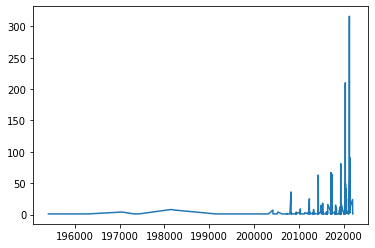

In [161]:
week_count = GEO_metadata['adjusted_week'].value_counts().sort_index()
week_count.plot()

In [162]:
temp_dict = {}
for i in range(len(week_count)):
    for j in range(len(week_count)):
        temp_dict[(week_count.index[i],week_count.index[j])] = abs(j-i)

In [163]:
temp_df = pd.DataFrame(temp_dict, ['dist']).T

In [164]:
temp_df

dist
195413 195413     0
       195416     1
       195801     2
       196301     3
       197053     4
...             ...
202206 202201     4
       202202     3
       202203     2
       202204     1
       202206     0

[73441 rows x 1 columns]

In [16]:
GEO_metadata['adjusted_week']

0       202140
1       202140
2       202140
3       201909
4       202203
         ...  
2946    202120
2947    202120
2948    202120
2949    202120
2950    202120
Name: adjusted_week, Length: 2951, dtype: int64

In [165]:
All_Edges

0            1
0        51870743082  51870743082
1        51870743082  51871789478
2        51870743082  51870742942
3        51870743082  51870380541
4        51870743082  51863124066
...              ...          ...
8708396  51233434888  51233430558
8708397  51233434888  51234286630
8708398  51233434888  51234294135
8708399  51233434888  51234291635
8708400  51233434888  51233434888

[8708401 rows x 2 columns]

In [166]:
All_Edges['Week_0'] = GEO_metadata.set_index('index.1')['adjusted_week'].loc[All_Edges[0]].reset_index()['adjusted_week']
All_Edges['Week_1'] = GEO_metadata.set_index('index.1')['adjusted_week'].loc[All_Edges[1]].reset_index()['adjusted_week']

In [167]:
All_Edges = All_Edges.merge(temp_df, how='left', left_on=['Week_0','Week_1'], right_index=True)

In [168]:
All_Edges['Temporal_Similarity'] = abs((2-All_Edges['dist'])/2*(All_Edges['dist']<2))

In [169]:
All_Edges['Temporal_Similarity'].value_counts()

0.0    8207210
1.0     263179
0.5     238012
Name: Temporal_Similarity, dtype: int64

In [170]:
All_Edges

0            1  Week_0  Week_1  dist  Temporal_Similarity
0        51870743082  51870743082  202140  202140     0                  1.0
1        51870743082  51871789478  202140  202140     0                  1.0
2        51870743082  51870742942  202140  202140     0                  1.0
3        51870743082  51870380541  202140  201909    90                  0.0
4        51870743082  51863124066  202140  202203    14                  0.0
...              ...          ...     ...     ...   ...                  ...
8708396  51233434888  51233430558  202120  202120     0                  1.0
8708397  51233434888  51234286630  202120  202120     0                  1.0
8708398  51233434888  51234294135  202120  202120     0                  1.0
8708399  51233434888  51234291635  202120  202120     0                  1.0
8708400  51233434888  51233434888  202120  202120     0                  1.0

[8708401 rows x 6 columns]

In [171]:
(All_Edges['Temporal_Similarity']>0).sum()

501191

In [172]:
(All_Edges['Temporal_Similarity']==1).sum()

263179

### Social Graph

In [173]:
social_links

User0          User1  self friend  interest  mutual
0       47954272@N06   47954272@N06     1      1  1.000000    True
1       47954272@N06   64148082@N02     0  False  0.000000   False
2       47954272@N06  186704588@N07     0  False  0.000000   False
3       47954272@N06   61033692@N00     0  False  0.000000   False
4       47954272@N06   69376724@N06     0  False  0.021277   False
...              ...            ...   ...    ...       ...     ...
108895  85941441@N04  144576996@N06     0  False  0.000000   False
108896  85941441@N04  127547040@N07     0  False  0.000000   False
108897  85941441@N04   87413031@N03     0  False  0.000000   False
108898  85941441@N04  112273443@N02     0  False  0.000000   False
108899  85941441@N04   85941441@N04     1      1  1.000000    True

[108900 rows x 6 columns]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_22048\2726203132.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  social_links[social_links.interest<1][social_links.interest>0]['interest'].hist(bins=50, log=True)


<AxesSubplot:>

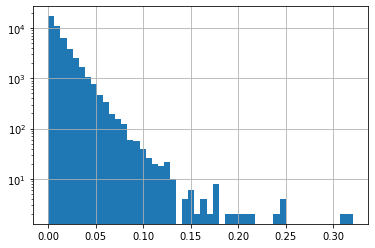

In [174]:
social_links[social_links.interest<1][social_links.interest>0]['interest'].hist(bins=50, log=True)

In [175]:
(social_links['interest']>0.05).sum()

2022

In [176]:
social_links['relationship'] = ((social_links['self'].astype(int)*2 + (social_links['friend']=='True').astype(int) + (social_links['interest']>0.05).astype(int))).astype(int)

In [177]:
(social_links['friend']=='True').sum()

606

In [178]:
social_links['self'].sum()

330

In [179]:
social_links['relationship'].value_counts()

0    106358
1      2126
3       330
2        86
Name: relationship, dtype: int64

In [180]:
social_links

User0          User1  self friend  interest  mutual  \
0       47954272@N06   47954272@N06     1      1  1.000000    True   
1       47954272@N06   64148082@N02     0  False  0.000000   False   
2       47954272@N06  186704588@N07     0  False  0.000000   False   
3       47954272@N06   61033692@N00     0  False  0.000000   False   
4       47954272@N06   69376724@N06     0  False  0.021277   False   
...              ...            ...   ...    ...       ...     ...   
108895  85941441@N04  144576996@N06     0  False  0.000000   False   
108896  85941441@N04  127547040@N07     0  False  0.000000   False   
108897  85941441@N04   87413031@N03     0  False  0.000000   False   
108898  85941441@N04  112273443@N02     0  False  0.000000   False   
108899  85941441@N04   85941441@N04     1      1  1.000000    True   

        relationship  
0                  3  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
108895             0  
108896             0  
108897             0  
108898             0  
108899             3  

[108900 rows x 7 columns]

In [181]:
H0 = nx.from_pandas_edgelist(social_links[social_links.relationship>0], source='User0', target='User1', 
                            edge_attr=['self','friend','interest','relationship'])

In [182]:
H1 = nx.from_pandas_edgelist(social_links[social_links.relationship>0][social_links.relationship<3], source='User0', target='User1', 
                            edge_attr=['self','friend','interest','relationship'])

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_22048\454995413.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H1 = nx.from_pandas_edgelist(social_links[social_links.relationship>0][social_links.relationship<3], source='User0', target='User1',


In [183]:
len(H0.nodes)

330

In [184]:
len(H1.nodes)

238

In [185]:
len(H0.edges)

1436

In [186]:
len(H1.edges)

1106

In [187]:
len(H0['17726320@N03'])

16

In [188]:
len(H1['17726320@N03'])

15

In [189]:
nx.is_connected(H0)

False

In [190]:
nx.is_connected(H1)

False

In [41]:
nx.number_connected_components(H0)

95

In [42]:
nx.number_connected_components(H1)

3

In [43]:
nx.density(H0)

0.026452979644469007

In [44]:
nx.density(H1)

0.0392156862745098

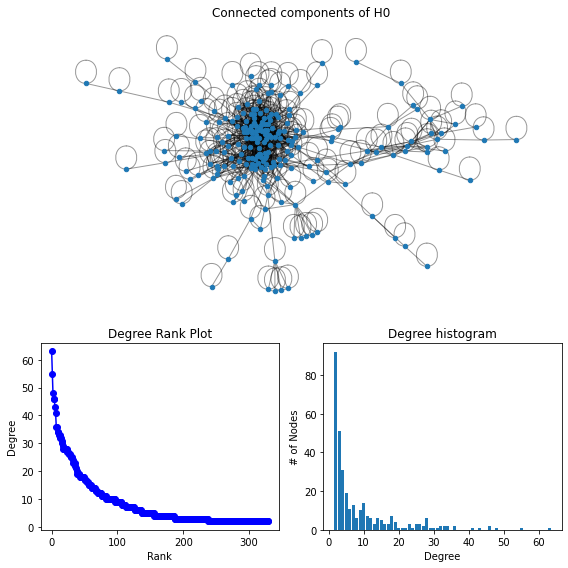

In [45]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H0.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H0.subgraph(sorted(nx.connected_components(H0), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of H0")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [46]:
size = [GEO_metadata.groupby('owner').count()['x'].loc[v] for v in H1]

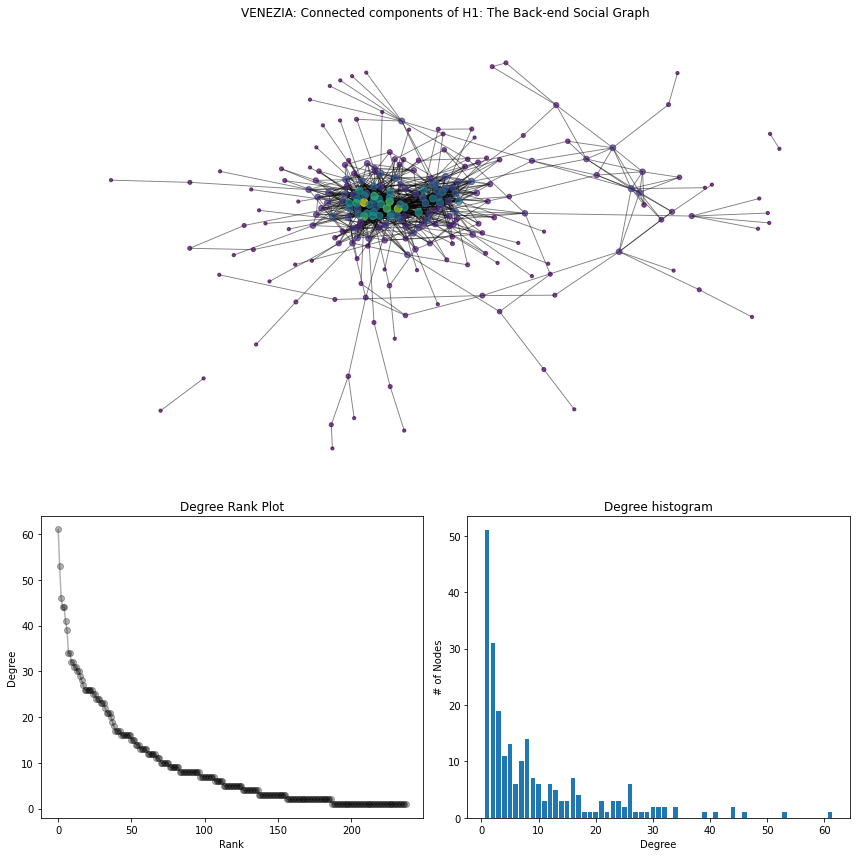

In [903]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=[15*np.log(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.5, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("VENEZIA: Connected components of H1: The Back-end Social Graph")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

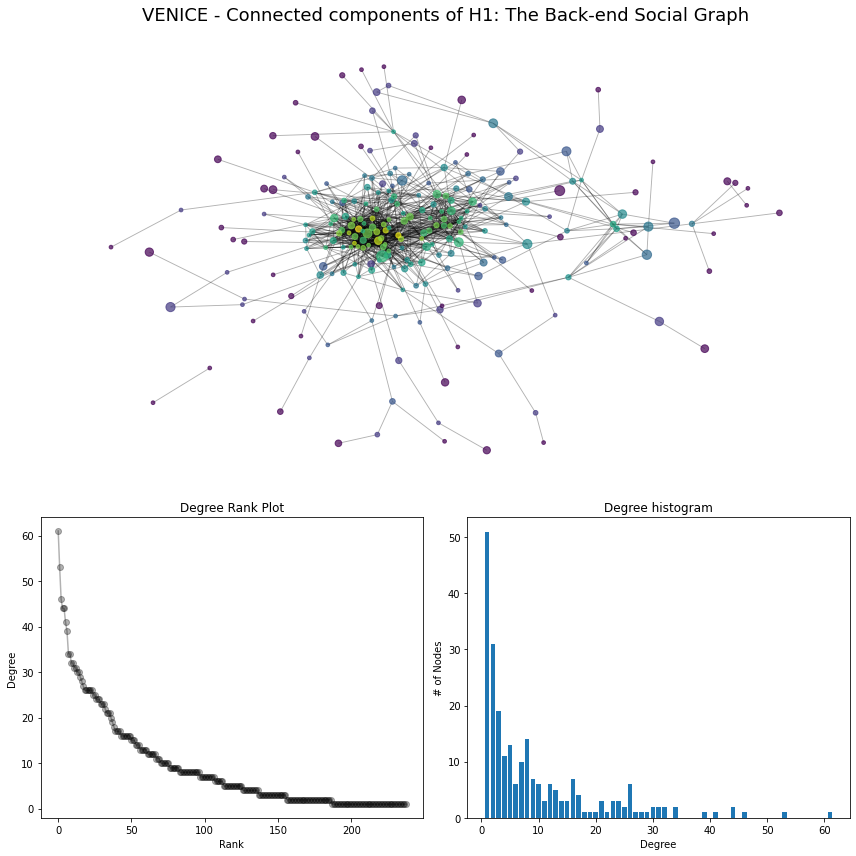

In [58]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.2, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20*np.log(np.array(size)+1), 
                       node_color=[(np.log10(Gcc.degree(v))) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("VENICE - Connected components of H1: The Back-end Social Graph",size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [64]:
np.unique(size,return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         15,  16,  17,  18,  19,  20,  21,  31,  35,  36,  47,  49,  56,
         57,  63,  66,  69,  80,  86, 140, 226, 423], dtype=int64),
 array([92, 35, 27, 14, 12,  5,  6,  6,  3,  3,  2,  1,  1,  4,  2,  4,  1,
         3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1], dtype=int64))

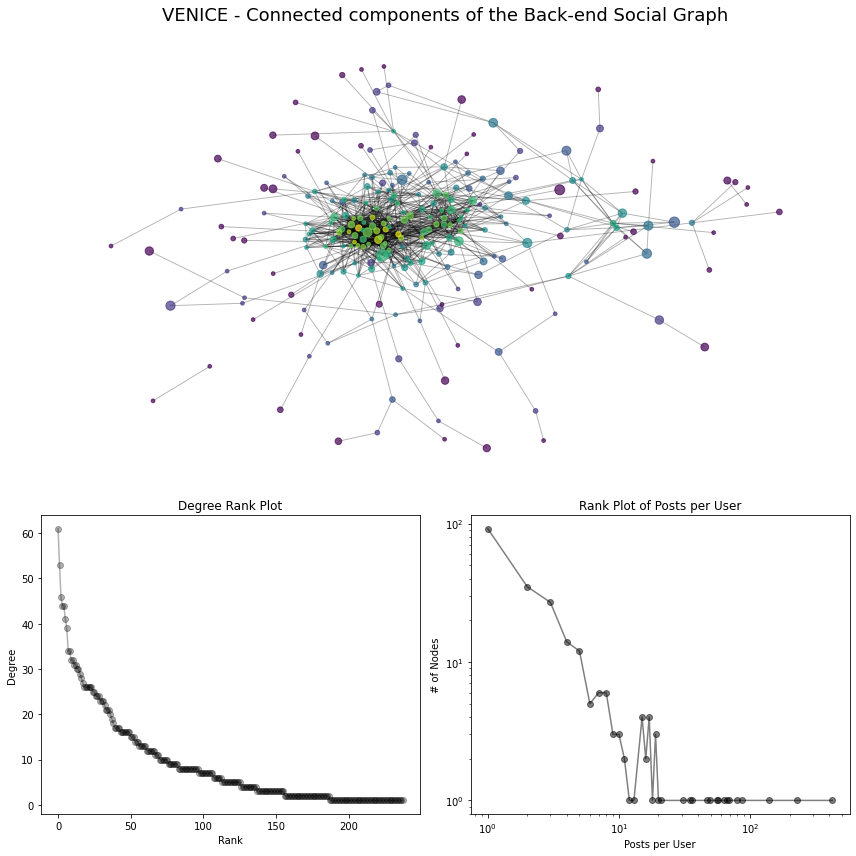

In [75]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.2, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20*np.log(np.array(size)+1), 
                       node_color=[(np.log10(Gcc.degree(v))) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("VENICE - Connected components of the Back-end Social Graph",size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.plot(*np.unique(size, return_counts=True),"k-", alpha=0.5,marker="o")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title("Rank Plot of Posts per User")
ax2.set_xlabel("Posts per User")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


average shortest path length 3.5055519029878006

length #paths
0 234
1 2208
2 12120
3 16478
4 10772
5 7166
6 3840
7 1486
8 370
9 72
10 10
radius: 6
diameter: 10
center: ['64148082@N02', '65181591@N06', '125601701@N03', '47968802@N08', '130345501@N04', '37472264@N04', '31023949@N03', '100629421@N07', '135895861@N02', '163845580@N02', '27964309@N06', '98508400@N04', '27457334@N02', '141443760@N06', '97402086@N00']
periphery: ['15416816@N05', '10101620@N07', '163158844@N05', '164615624@N04', '39315083@N07', '149818313@N06']
density: 0.04049741388797183


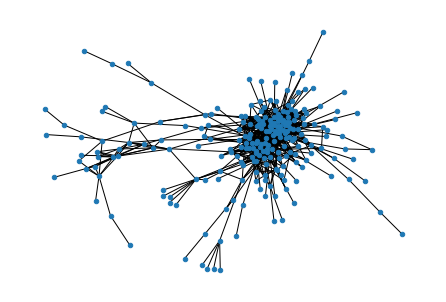

In [469]:
G=H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
pathlengths = []

#print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    #print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
#print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=False, node_size=20)
plt.show()

In [191]:
social_links[['User0','User1','relationship']]

User0          User1  relationship
0       47954272@N06   47954272@N06             3
1       47954272@N06   64148082@N02             0
2       47954272@N06  186704588@N07             0
3       47954272@N06   61033692@N00             0
4       47954272@N06   69376724@N06             0
...              ...            ...           ...
108895  85941441@N04  144576996@N06             0
108896  85941441@N04  127547040@N07             0
108897  85941441@N04   87413031@N03             0
108898  85941441@N04  112273443@N02             0
108899  85941441@N04   85941441@N04             3

[108900 rows x 3 columns]

In [192]:
All_Edges['User_0'] = GEO_metadata.set_index('index.1')['owner'].loc[All_Edges[0]].reset_index()['owner']
All_Edges['User_1'] = GEO_metadata.set_index('index.1')['owner'].loc[All_Edges[1]].reset_index()['owner']

In [193]:
All_Edges = All_Edges.merge(social_links[['User0','User1','relationship']], how='left', 
                                                 left_on=['User_0','User_1'], right_on = ['User0','User1'])

In [194]:
All_Edges = All_Edges.drop(['User0','User1'],axis=1)

In [195]:
All_Edges['Social_Similarity'] = All_Edges['relationship']/3

In [196]:
All_Edges

0            1  Week_0  Week_1  dist  Temporal_Similarity  \
0        51870743082  51870743082  202140  202140     0                  1.0   
1        51870743082  51871789478  202140  202140     0                  1.0   
2        51870743082  51870742942  202140  202140     0                  1.0   
3        51870743082  51870380541  202140  201909    90                  0.0   
4        51870743082  51863124066  202140  202203    14                  0.0   
...              ...          ...     ...     ...   ...                  ...   
8708396  51233434888  51233430558  202120  202120     0                  1.0   
8708397  51233434888  51234286630  202120  202120     0                  1.0   
8708398  51233434888  51234294135  202120  202120     0                  1.0   
8708399  51233434888  51234291635  202120  202120     0                  1.0   
8708400  51233434888  51233434888  202120  202120     0                  1.0   

               User_0         User_1  relationship  Social_Similarity  
0        47954272@N06   47954272@N06             3                1.0  
1        47954272@N06   47954272@N06             3                1.0  
2        47954272@N06   47954272@N06             3                1.0  
3        47954272@N06   64148082@N02             0                0.0  
4        47954272@N06  186704588@N07             0                0.0  
...               ...            ...           ...                ...  
8708396  83293103@N00   83293103@N00             3                1.0  
8708397  83293103@N00   83293103@N00             3                1.0  
8708398  83293103@N00   83293103@N00             3                1.0  
8708399  83293103@N00   83293103@N00             3                1.0  
8708400  83293103@N00   83293103@N00             3                1.0  

[8708401 rows x 10 columns]

In [197]:
(All_Edges['Social_Similarity']!=0).sum()

488103

In [198]:
(All_Edges['Social_Similarity']==1).sum()

314457

### Spatial Graph

In [199]:
All_Edges['GEO_0'] = GEO_metadata.set_index('index.1')['GEO_node'].loc[All_Edges[0]].reset_index()['GEO_node']
All_Edges['GEO_1'] = GEO_metadata.set_index('index.1')['GEO_node'].loc[All_Edges[1]].reset_index()['GEO_node']

In [200]:
All_Edges

0            1  Week_0  Week_1  dist  Temporal_Similarity  \
0        51870743082  51870743082  202140  202140     0                  1.0   
1        51870743082  51871789478  202140  202140     0                  1.0   
2        51870743082  51870742942  202140  202140     0                  1.0   
3        51870743082  51870380541  202140  201909    90                  0.0   
4        51870743082  51863124066  202140  202203    14                  0.0   
...              ...          ...     ...     ...   ...                  ...   
8708396  51233434888  51233430558  202120  202120     0                  1.0   
8708397  51233434888  51234286630  202120  202120     0                  1.0   
8708398  51233434888  51234294135  202120  202120     0                  1.0   
8708399  51233434888  51234291635  202120  202120     0                  1.0   
8708400  51233434888  51233434888  202120  202120     0                  1.0   

               User_0         User_1  relationship  Social_Similarity  \
0        47954272@N06   47954272@N06             3                1.0   
1        47954272@N06   47954272@N06             3                1.0   
2        47954272@N06   47954272@N06             3                1.0   
3        47954272@N06   64148082@N02             0                0.0   
4        47954272@N06  186704588@N07             0                0.0   
...               ...            ...           ...                ...   
8708396  83293103@N00   83293103@N00             3                1.0   
8708397  83293103@N00   83293103@N00             3                1.0   
8708398  83293103@N00   83293103@N00             3                1.0   
8708399  83293103@N00   83293103@N00             3                1.0   
8708400  83293103@N00   83293103@N00             3                1.0   

              GEO_0       GEO_1  
0        7636418620  7636418620  
1        7636418620  7636418620  
2        7636418620  1851468091  
3        7636418620  7887753052  
4        7636418620  4437784469  
...             ...         ...  
8708396   944189412   944189018  
8708397   944189412  4878955710  
8708398   944189412  4919658949  
8708399   944189412   944189121  
8708400   944189412   944189412  

[8708401 rows x 12 columns]

In [201]:
GEO_node_dist

7636418620  1851468091  7887753052  4437784469  27231707  \
7636418620         0.0        24.0       206.8       213.1     179.3   
1851468091        24.0         0.0       190.0       190.6     160.3   
7887753052       206.8       190.0         0.0        43.5     117.3   
4437784469       213.1       190.6        43.5         0.0     106.1   
27231707         179.3       160.3       117.3       106.1       0.0   
...                ...         ...         ...         ...       ...   
944189412        327.8       305.3       159.4       119.1     202.9   
1327380181       366.8       373.3       563.3       563.9     528.6   
944189121        322.1       299.6       153.7       113.4     197.2   
4471751053        69.9        62.0       149.3       160.9     177.4   
271343269        178.1       155.6        53.9        71.2      88.3   

            1996193041  1863759288  245128972  3586376601  251147479  ...  \
7636418620       310.0       202.0      156.1       122.4      143.3  ...   
1851468091       287.5       179.5      133.6       116.8      120.8  ...   
7887753052       168.2        32.4       60.4        88.8       75.4  ...   
4437784469       135.0        11.1       60.5       100.4       76.0  ...   
27231707         152.3       106.3       60.0       142.3       79.0  ...   
...                ...         ...        ...         ...        ...  ...   
944189412        185.8       127.0      175.2       216.3      190.7  ...   
1327380181       660.8       552.8      506.9       485.1      494.1  ...   
944189121        180.1       121.3      169.5       210.6      185.0  ...   
4471751053       271.3       149.8      117.4        64.9      104.6  ...   
271343269        178.7        60.1       28.3        61.0       41.0  ...   

            1833539390  248119073  248776130  1920433297  3586674306  \
7636418620        77.2      227.7      203.4       214.4       230.4   
1851468091        71.6      208.7      180.9       191.9       207.9   
7887753052       154.4      102.0       71.3        78.0        62.0   
4437784469       166.0       73.2       48.2        45.2        21.7   
27231707         207.9       49.2       60.9        77.1       116.2   
...                ...        ...        ...         ...         ...   
944189412        281.9      153.7      150.4       132.4       105.4   
1327380181       439.9      577.0      554.2       565.2       581.2   
944189121        276.2      148.0      144.7       126.7        99.7   
4471751053        51.1      195.4      164.7       175.7       179.4   
271343269        126.6      102.8       72.1        83.1        89.7   

            944189412  1327380181  944189121  4471751053  271343269  
7636418620      327.8       372.2      322.1        69.9      178.1  
1851468091      305.3       380.3      299.6        62.0      155.6  
7887753052      159.4       570.3      153.7       149.3       53.9  
4437784469      119.1       570.9      113.4       160.9       71.2  
27231707        202.9       535.6      197.2       177.4       88.3  
...               ...         ...        ...         ...        ...  
944189412         0.0       685.6        5.7       276.8      187.1  
1327380181      678.6         0.0      672.9       432.6      528.9  
944189121         5.7       679.9        0.0       271.1      181.4  
4471751053      276.8       439.6      271.1         0.0      121.5  
271343269       187.1       535.9      181.4       121.5        0.0  

[935 rows x 935 columns]

In [202]:
GEO_dict = {}
for i in GEO_node_dist.index:
    for j in GEO_node_dist.index:
        GEO_dict[(i,j)] = (GEO_node_dist[str(i)][j] + GEO_node_dist[str(j)][i])/2

In [203]:
GEO_df = pd.DataFrame(GEO_dict, ['geo_distance']).T

In [204]:
GEO_df

geo_distance
7636418620 7636418620           0.0
           1851468091          24.0
           7887753052         206.8
           4437784469         213.1
           27231707           179.3
...                             ...
271343269  944189412          187.1
           1327380181         532.4
           944189121          181.4
           4471751053         121.5
           271343269            0.0

[874225 rows x 1 columns]

<AxesSubplot:>

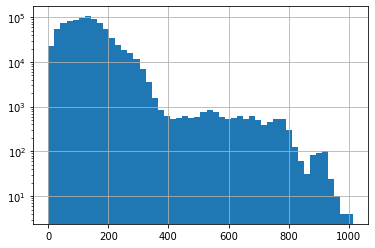

In [205]:
GEO_df['geo_distance'].hist(log=True, bins=50)

In [206]:
GEO_df['geo_distance'].quantile(0.02)

17.5

In [207]:
(GEO_df['geo_distance']<20).sum()

21705

In [126]:
GEO_df

geo_distance
7636418620 7636418620           0.0
           1851468091          24.0
           7887753052         206.8
           4437784469         213.1
           27231707           179.3
...                             ...
271343269  944189412          187.1
           1327380181         532.4
           944189121          181.4
           4471751053         121.5
           271343269            0.0

[874225 rows x 1 columns]

In [208]:
H2 = nx.from_pandas_edgelist(GEO_df[GEO_df['geo_distance']<20][GEO_df['geo_distance']>0].reset_index(), 
                             source='level_0', target='level_1', edge_attr=['geo_distance'])

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_22048\1381867291.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H2 = nx.from_pandas_edgelist(GEO_df[GEO_df['geo_distance']<20][GEO_df['geo_distance']>0].reset_index(),


In [209]:
len(H2.nodes)

915

In [210]:
len(H2.edges)

10385

In [212]:
len(H2[3403782580])

20

In [213]:
H2.is_directed()

False

In [214]:
nx.is_connected(H2)

False

In [215]:
nx.number_connected_components(H2)

6

In [216]:
nx.density(H2)

0.02483528835001375

In [217]:
H2[3403782580]

AtlasView({3403782567: {'geo_distance': 11.0}, 1852597409: {'geo_distance': 13.4}, 1833539391: {'geo_distance': 11.3}, 1833566331: {'geo_distance': 13.6}, 1854431375: {'geo_distance': 18.5}, 5643472558: {'geo_distance': 15.8}, 5476827183: {'geo_distance': 16.2}, 5844256702: {'geo_distance': 18.1}, 3403782894: {'geo_distance': 11.5}, 5844256701: {'geo_distance': 19.8}, 5137758827: {'geo_distance': 12.2}, 3403782572: {'geo_distance': 6.300000000000001}, 3403782586: {'geo_distance': 3.1}, 1852597433: {'geo_distance': 8.9}, 61083112: {'geo_distance': 8.1}, 3403782893: {'geo_distance': 6.0}, 1833539792: {'geo_distance': 12.3}, 1854261812: {'geo_distance': 12.5}, 3403782576: {'geo_distance': 5.300000000000001}, 1522247328: {'geo_distance': 18.4}})

In [218]:
GEO_nodes

y          x  street_count        pr        bc        dg  \
osmid                                                                          
27178184    45.438197  12.335686             4  0.000197  0.208517  0.001368   
764403528   45.438128  12.335605             3  0.000175  0.025767  0.001026   
1675825096  45.438233  12.335728             3  0.000186  0.048636  0.001026   
8670969688  45.438255  12.335601             3  0.000111  0.207535  0.001026   
5395065019  45.438053  12.335932             4  0.000236  0.196443  0.001368   
...               ...        ...           ...       ...       ...       ...   
9196476006  45.441902  12.307559             3  0.000119  0.000691  0.001026   
9196521176  45.438670  12.326683             1  0.000077  0.000000  0.000342   
9221655954  45.467211  12.279144             1  0.000030  0.000000  0.000342   
9379177140  45.432392  12.331032             1  0.000073  0.000000  0.000342   
9439079311  45.445912  12.317267             1  0.000130  0.000000  0.000342   

                  cl highway                       geometry  
osmid                                                        
27178184    0.005999     NaN  POINT (12.3356863 45.4381974)  
764403528   0.005985     NaN  POINT (12.3356054 45.4381284)  
1675825096  0.005990     NaN  POINT (12.3357281 45.4382329)  
8670969688  0.005998     NaN  POINT (12.3356013 45.4382549)  
5395065019  0.006001     NaN  POINT (12.3359319 45.4380532)  
...              ...     ...                            ...  
9196476006  0.004071     NaN  POINT (12.3075592 45.4419018)  
9196521176  0.005886     NaN   POINT (12.326683 45.4386701)  
9221655954  0.001992     NaN   POINT (12.2791441 45.467211)  
9379177140  0.005220     NaN  POINT (12.3310316 45.4323915)  
9439079311  0.004516     NaN  POINT (12.3172675 45.4459124)  

[5848 rows x 9 columns]

In [219]:
GEO_metadata['GEO_node']

0       7636418620
1       7636418620
2       1851468091
3       7887753052
4       4437784469
           ...    
2946     944189018
2947    4878955710
2948    4919658949
2949     944189121
2950     944189412
Name: GEO_node, Length: 2951, dtype: int64

In [220]:
size = [GEO_metadata.groupby('GEO_node').count()['x'].loc[v] for v in H2]

In [221]:
len(size)

915

In [100]:
len([10*np.log(Gcc.degree(v)+1) for v in Gcc])

238

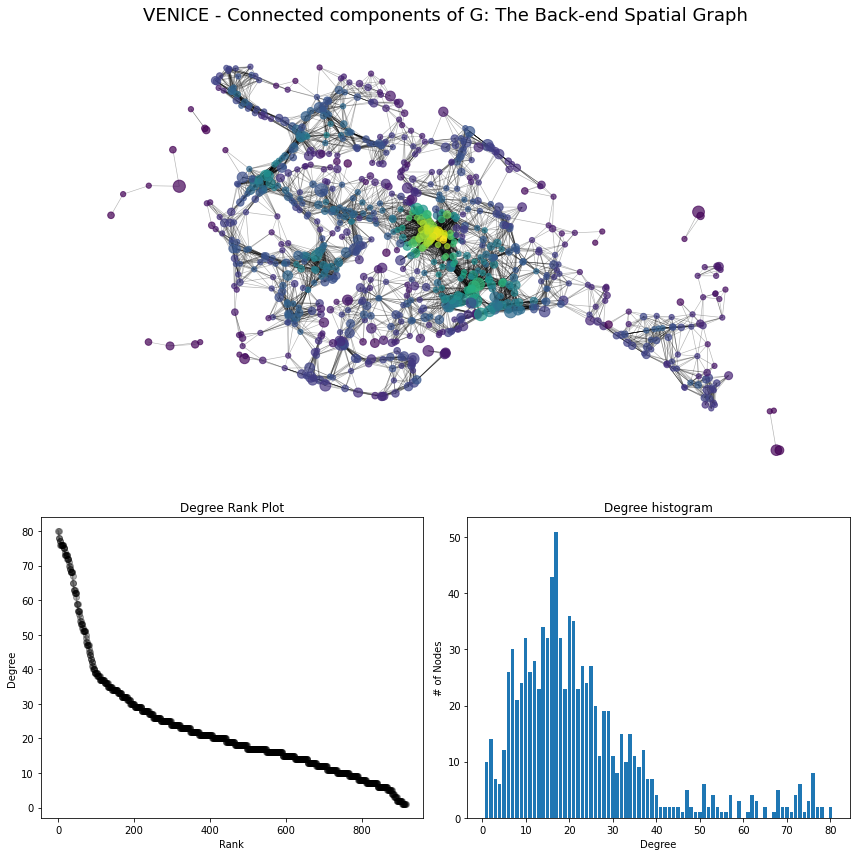

In [101]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H2.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H2.subgraph(sorted(nx.connected_components(H2), key=len, reverse=True)[0])
Gcc = H2
pos = {v: np.array((GEO_nodes.loc[v]['x'],GEO_nodes.loc[v]['y'])) for v in H2}
#size = {v: GEO_metadata.groupby('GEO_node').count()['x'].loc[v] for v in H2}
#pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='geo_distance')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=np.log(np.array(size)+1)*40, 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [0.5*np.log10(e[2]['geo_distance']+1) for e in Gcc.edges(data=True)])
ax0.set_title("VENICE - Connected components of G: The Back-end Spatial Graph",size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [137]:
len(size)

915

In [222]:
size_p = -np.array(size)
size_p.sort()
size_p = -size_p

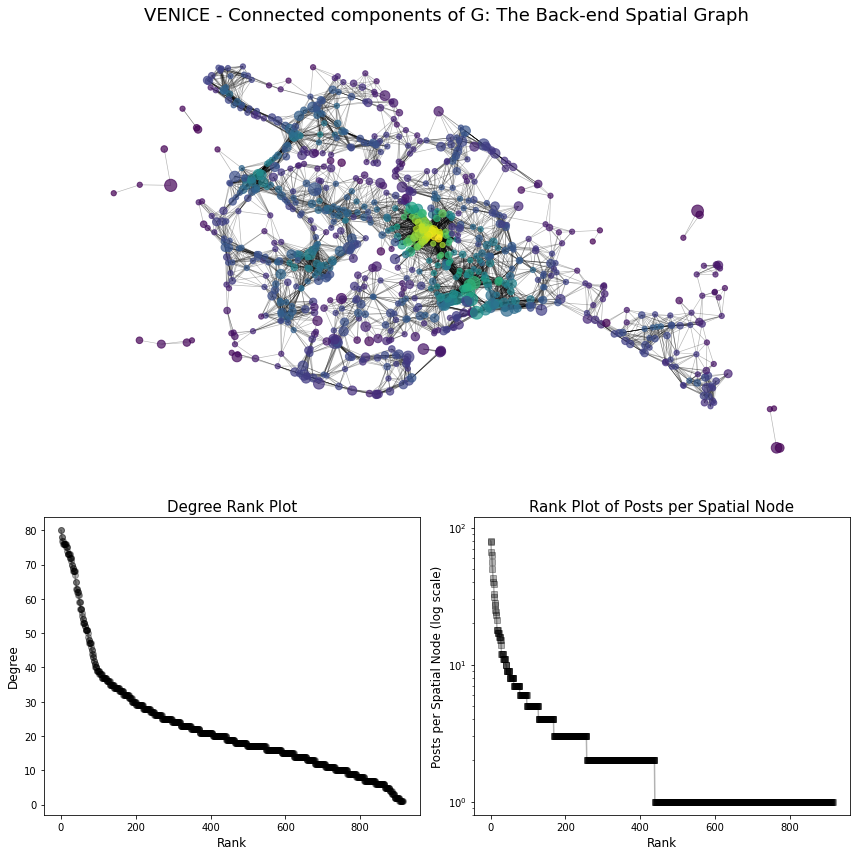

In [223]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H2.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H2.subgraph(sorted(nx.connected_components(H2), key=len, reverse=True)[0])
Gcc = H2
pos = {v: np.array((GEO_nodes.loc[v]['x'],GEO_nodes.loc[v]['y'])) for v in H2}
#size = {v: GEO_metadata.groupby('GEO_node').count()['x'].loc[v] for v in H2}
#pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='geo_distance')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=np.log(np.array(size)+1)*40, 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [0.5*np.log10(e[2]['geo_distance']+1) for e in Gcc.edges(data=True)])
ax0.set_title("VENICE - Connected components of G: The Back-end Spatial Graph",size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot",size=15)
ax1.set_ylabel("Degree",size=12)
ax1.set_xlabel("Rank",size=12)

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.plot(size_p, "k-", alpha=0.3, marker="s")
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_title("Rank Plot of Posts per Spatial Node",size=15)
ax2.set_xlabel("Rank",size=12)
ax2.set_ylim(0.8,120)
ax2.set_ylabel("Posts per Spatial Node (log scale)",size=12)

fig.tight_layout()
plt.show()


average shortest path length 7.816382864223493

length #paths
0 897
1 20748
2 39550
3 55618
4 65256
5 66566
6 67624
7 74782
8 81598
9 79076
10 66768
11 52400
12 39080
13 27582
14 19998
15 14522
16 11234
17 8626
18 5976
19 3868
20 1808
21 828
22 204
radius: 11
diameter: 22
center: [31318035]
periphery: [2258482925, 1932060523, 2974990096, 8059663155, 1937756586, 4144512944, 957110909, 7886537292, 4144512972, 7886537293, 1935858929, 5202565368, 1832350555, 2974723557, 2974723565, 8814996339, 8814996337, 1849034317, 8814996340, 1933500830, 8814996331, 3165800114, 27452289]
density: 0.025815217391304348


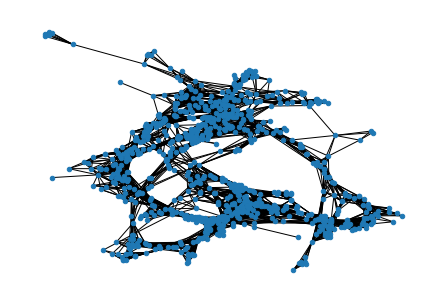

In [627]:
G=H2.subgraph(sorted(nx.connected_components(H2), key=len, reverse=True)[0])
pathlengths = []

#print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    #print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
#print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=False, node_size=20)
plt.show()

In [224]:
All_Edges = All_Edges.merge(GEO_df, how='left', left_on=['GEO_0','GEO_1'], right_index=True)

<AxesSubplot:>

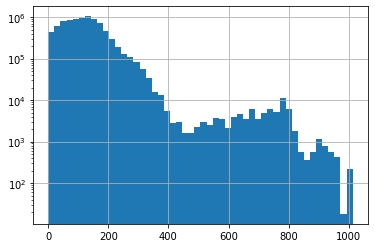

In [225]:
All_Edges['geo_distance'].hist(log=True, bins=50)

In [226]:
All_Edges['Spatial_Similarity'] = abs((20-All_Edges['geo_distance'])/20 * (All_Edges['geo_distance']<=20)).fillna(0)

In [227]:
All_Edges['One_Edge'] = (All_Edges['Spatial_Similarity']+All_Edges['Social_Similarity']+All_Edges['Temporal_Similarity'])>0

In [228]:
All_Edges['Same_Node'] = All_Edges[0]==All_Edges[1]

In [229]:
All_Edges_Graph = All_Edges[All_Edges['One_Edge']][~All_Edges['Same_Node']]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_22048\3347584611.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  All_Edges_Graph = All_Edges[All_Edges['One_Edge']][~All_Edges['Same_Node']]


In [230]:
All_Edges_Graph

0            1  Week_0  Week_1  dist  Temporal_Similarity  \
1        51870743082  51871789478  202140  202140     0                  1.0   
2        51870743082  51870742942  202140  202140     0                  1.0   
8        51870743082  51858312666  202140  202139     1                  0.5   
12       51870743082  51855730156  202140  202139     1                  0.5   
28       51870743082  51847785831  202140  202139     1                  0.5   
...              ...          ...     ...     ...   ...                  ...   
8708395  51233434888  51233431343  202120  202120     0                  1.0   
8708396  51233434888  51233430558  202120  202120     0                  1.0   
8708397  51233434888  51234286630  202120  202120     0                  1.0   
8708398  51233434888  51234294135  202120  202120     0                  1.0   
8708399  51233434888  51234291635  202120  202120     0                  1.0   

               User_0         User_1  relationship  Social_Similarity  \
1        47954272@N06   47954272@N06             3                1.0   
2        47954272@N06   47954272@N06             3                1.0   
8        47954272@N06  123016824@N05             0                0.0   
12       47954272@N06  123016824@N05             0                0.0   
28       47954272@N06  123016824@N05             0                0.0   
...               ...            ...           ...                ...   
8708395  83293103@N00   83293103@N00             3                1.0   
8708396  83293103@N00   83293103@N00             3                1.0   
8708397  83293103@N00   83293103@N00             3                1.0   
8708398  83293103@N00   83293103@N00             3                1.0   
8708399  83293103@N00   83293103@N00             3                1.0   

              GEO_0       GEO_1  geo_distance  Spatial_Similarity  One_Edge  \
1        7636418620  7636418620           0.0               1.000      True   
2        7636418620  1851468091          24.0               0.000      True   
8        7636418620   245128972         156.1               0.000      True   
12       7636418620  3549647041         187.8               0.000      True   
28       7636418620   271996905         153.6               0.000      True   
...             ...         ...           ...                 ...       ...   
8708395   944189412   944189125           7.2               0.640      True   
8708396   944189412   944189018           5.3               0.735      True   
8708397   944189412  4878955710          11.6               0.420      True   
8708398   944189412  4919658949          11.9               0.405      True   
8708399   944189412   944189121           5.7               0.715      True   

         Same_Node  
1            False  
2            False  
8            False  
12           False  
28           False  
...            ...  
8708395      False  
8708396      False  
8708397      False  
8708398      False  
8708399      False  

[1069026 rows x 16 columns]

In [231]:
(All_Edges_Graph['Spatial_Similarity']!=0).sum()

442828

In [232]:
(All_Edges_Graph['Spatial_Similarity']==1).sum()

46238

In [233]:
All_Edges_Graph.to_csv('Venezia/data_storage/Edge_List.csv', sep='\t')

In [2]:
All_Edges_Graph = pd.read_csv('Venezia/data_storage/Edge_List.csv', sep='\t', index_col='Unnamed: 0')

In [41]:
All_Edges_Graph[All_Edges_Graph.Temporal_Similarity>0].loc[:,['0','1','Temporal_Similarity','Week_0','Week_1']]

0            1  Temporal_Similarity  Week_0  Week_1
1        51870743082  51871789478                  1.0  202140  202140
2        51870743082  51870742942                  1.0  202140  202140
8        51870743082  51858312666                  0.5  202140  202139
12       51870743082  51855730156                  0.5  202140  202139
28       51870743082  51847785831                  0.5  202140  202139
...              ...          ...                  ...     ...     ...
8708395  51233434888  51233431343                  1.0  202120  202120
8708396  51233434888  51233430558                  1.0  202120  202120
8708397  51233434888  51234286630                  1.0  202120  202120
8708398  51233434888  51234294135                  1.0  202120  202120
8708399  51233434888  51234291635                  1.0  202120  202120

[498240 rows x 5 columns]

In [91]:
All_Edges_Graph

0            1  Week_0  Week_1  dist  Temporal_Similarity  \
1        51870743082  51871789478  202140  202140     0                  1.0   
2        51870743082  51870742942  202140  202140     0                  1.0   
8        51870743082  51858312666  202140  202139     1                  0.5   
12       51870743082  51855730156  202140  202139     1                  0.5   
28       51870743082  51847785831  202140  202139     1                  0.5   
...              ...          ...     ...     ...   ...                  ...   
8708395  51233434888  51233431343  202120  202120     0                  1.0   
8708396  51233434888  51233430558  202120  202120     0                  1.0   
8708397  51233434888  51234286630  202120  202120     0                  1.0   
8708398  51233434888  51234294135  202120  202120     0                  1.0   
8708399  51233434888  51234291635  202120  202120     0                  1.0   

               User_0         User_1  relationship  Social_Similarity  \
1        47954272@N06   47954272@N06             3                1.0   
2        47954272@N06   47954272@N06             3                1.0   
8        47954272@N06  123016824@N05             0                0.0   
12       47954272@N06  123016824@N05             0                0.0   
28       47954272@N06  123016824@N05             0                0.0   
...               ...            ...           ...                ...   
8708395  83293103@N00   83293103@N00             3                1.0   
8708396  83293103@N00   83293103@N00             3                1.0   
8708397  83293103@N00   83293103@N00             3                1.0   
8708398  83293103@N00   83293103@N00             3                1.0   
8708399  83293103@N00   83293103@N00             3                1.0   

              GEO_0       GEO_1  geo_distance  Spatial_Similarity  One_Edge  \
1        7636418620  7636418620           0.0               1.000      True   
2        7636418620  1851468091          24.0               0.000      True   
8        7636418620   245128972         156.1               0.000      True   
12       7636418620  3549647041         187.8               0.000      True   
28       7636418620   271996905         153.6               0.000      True   
...             ...         ...           ...                 ...       ...   
8708395   944189412   944189125           7.2               0.640      True   
8708396   944189412   944189018           5.3               0.735      True   
8708397   944189412  4878955710          11.6               0.420      True   
8708398   944189412  4919658949          11.9               0.405      True   
8708399   944189412   944189121           5.7               0.715      True   

         Same_Node  
1            False  
2            False  
8            False  
12           False  
28           False  
...            ...  
8708395      False  
8708396      False  
8708397      False  
8708398      False  
8708399      False  

[1069003 rows x 16 columns]

In [234]:
All_Edges_Graph['Social_Similarity'].value_counts()

0.000000    583874
1.000000    311506
0.333333    171662
0.666667      1984
Name: Social_Similarity, dtype: int64

### Construction and Analysis on Graphs

In [235]:
G1 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Temporal_Similarity>0][[0,1,'Temporal_Similarity','Week_0','Week_1']], 
                             source=0, target=1,edge_attr=['Temporal_Similarity','Week_0','Week_1'])

In [3]:
G1 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Temporal_Similarity>0].loc[:,['0','1','Temporal_Similarity','Week_0','Week_1']], 
                             source='0', target='1',edge_attr=['Temporal_Similarity','Week_0','Week_1'])

In [4]:
len(G1.nodes)

2951

In [5]:
len(G1.edges)

249120

In [238]:
len(G1[51337278527])

509

In [239]:
nx.is_connected(G1)

True

In [240]:
nx.density(G1)

0.05723311259038878

In [150]:
pos_1 = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}

In [151]:
pos_1

{51870743082: array([12.3182119, 45.4384412]),
 51871789478: array([12.3182119, 45.4384412]),
 51870742942: array([12.3196901, 45.4385928]),
 51858312666: array([12.3366288, 45.4380393]),
 51855730156: array([12.3370194, 45.4341497]),
 51847785831: array([12.3362578, 45.4379801]),
 51846344255: array([12.3380325, 45.4367659]),
 51844341038: array([12.3431418, 45.4395081]),
 51844226641: array([12.3431418, 45.4395081]),
 51830349616: array([12.3358526, 45.437985 ]),
 51828195738: array([12.3266222, 45.4366668]),
 51822867500: array([12.3266222, 45.4366668]),
 51820291650: array([12.3362578, 45.4379801]),
 51816607709: array([12.3358526, 45.437985 ]),
 51812020818: array([12.3266222, 45.4366668]),
 51794415520: array([12.3266222, 45.4366668]),
 51773798516: array([12.3260718, 45.4300758]),
 51768265871: array([12.3319599, 45.4420541]),
 51755781605: array([12.3266222, 45.4366668]),
 51753381692: array([12.3573109, 45.439226 ]),
 51726400385: array([12.3319599, 45.4420541]),
 51700746084:

In [241]:
G2 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Social_Similarity>0][[0,1,'Social_Similarity','User_0','User_1','relationship']], 
                             source=0, target=1,edge_attr=['Social_Similarity','User_0','User_1','relationship'])

In [6]:
G2 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Social_Similarity>0].loc[:,['0','1','Social_Similarity','User_0','User_1','relationship']], 
                             source='0', target='1',edge_attr=['Social_Similarity','User_0','User_1','relationship'])

In [7]:
len(G2.nodes)

2916

In [243]:
len(G2.edges)

242576

In [244]:
len(G2[51337278527])

507

In [245]:
nx.is_connected(G2)

False

In [246]:
nx.number_connected_components(G2)

60

In [8]:
[len(c) for c in sorted(nx.connected_components(G2), key=len, reverse=True)]

[2309,
 63,
 48,
 36,
 36,
 34,
 33,
 30,
 26,
 20,
 20,
 19,
 19,
 18,
 14,
 12,
 11,
 9,
 9,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [247]:
nx.density(G2)

0.05707576581091606

In [248]:
G3 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Spatial_Similarity>0][[0,1,'Spatial_Similarity','GEO_0','GEO_1','geo_distance']], 
                             source=0, target=1,edge_attr=['Spatial_Similarity','GEO_0','GEO_1','geo_distance'])

In [9]:
G3 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Spatial_Similarity>0].loc[:,['0','1','Spatial_Similarity','GEO_0','GEO_1','geo_distance']], 
                             source='0', target='1',edge_attr=['Spatial_Similarity','GEO_0','GEO_1','geo_distance'])

In [10]:
len(G3.nodes)

2938

In [250]:
len(G3.edges)

221414

In [251]:
len(G3[51337278527])

47

In [252]:
nx.is_connected(G3)

False

In [11]:
nx.number_connected_components(G3)

13

In [12]:
[len(c) for c in sorted(nx.connected_components(G2), key=len, reverse=True)]

[2309,
 63,
 48,
 36,
 36,
 34,
 33,
 30,
 26,
 20,
 20,
 19,
 19,
 18,
 14,
 12,
 11,
 9,
 9,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [254]:
nx.density(G3)

0.05131913593681516

In [255]:
G = nx.MultiGraph()

In [256]:
G = nx.compose(nx.compose(G1,G2),G3)

In [63]:
G[51870743082]

AtlasView({51871789478: {'Temporal_Similarity': 1.0, 'Week_0': 202140, 'Week_1': 202140, 'Social_Similarity': 1.0, 'User_0': '47954272@N06', 'User_1': '47954272@N06', 'relationship': 3, 'Spatial_Similarity': 1.0, 'GEO_0': 7636418620, 'GEO_1': 7636418620, 'geo_distance': 0.0}, 51870742942: {'Temporal_Similarity': 1.0, 'Week_0': 202140, 'Week_1': 202140, 'Social_Similarity': 1.0, 'User_0': '47954272@N06', 'User_1': '47954272@N06', 'relationship': 3}, 51858312666: {'Temporal_Similarity': 0.5, 'Week_0': 202139, 'Week_1': 202140}, 51855730156: {'Temporal_Similarity': 0.5, 'Week_0': 202139, 'Week_1': 202140}, 51847785831: {'Temporal_Similarity': 0.5, 'Week_0': 202139, 'Week_1': 202140}, 51846344255: {'Temporal_Similarity': 0.5, 'Week_0': 202139, 'Week_1': 202140}, 51844341038: {'Temporal_Similarity': 0.5, 'Week_0': 202139, 'Week_1': 202140}, 51844226641: {'Temporal_Similarity': 0.5, 'Week_0': 202139, 'Week_1': 202140}, 51830349616: {'Temporal_Similarity': 0.5, 'Week_0': 202139, 'Week_1': 202

In [257]:
len(G.nodes)

2951

In [258]:
len(G.edges)

534513

In [170]:
len(G[51337278527])

622

In [259]:
nx.is_connected(G)

True

In [260]:
nx.density(G)

0.12279962552194315

In [173]:
pos = nx.spring_layout(G, seed=10396953, k=1)

In [174]:
len(pos)

2951

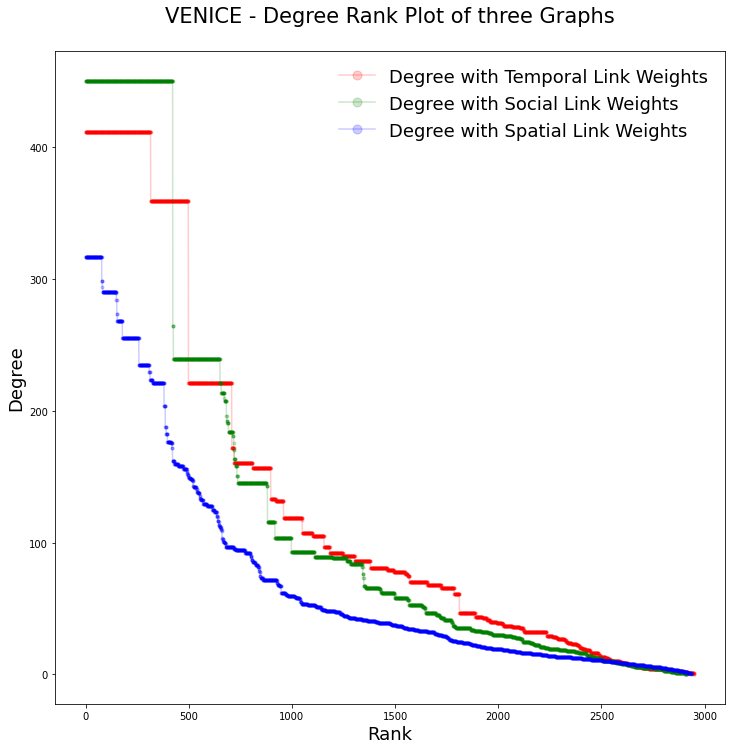

In [261]:
fig = plt.figure("Degree of a random graph", figsize=(12, 12))
ax = fig.add_subplot()
degree_sequence_1 = sorted((d for n, d in G1.degree(weight='Temporal_Similarity')), reverse=True)
degree_sequence_2 = sorted((d for n, d in G2.degree(weight='Social_Similarity')), reverse=True)
degree_sequence_3 = sorted((d for n, d in G3.degree(weight='Spatial_Similarity')), reverse=True)
dmax = max(degree_sequence_1+degree_sequence_2+degree_sequence_3)
plt.plot(degree_sequence_1, "r-", alpha=0.2, marker="o", markersize=3, label='Degree with Temporal Link Weights')
plt.plot(degree_sequence_2, "g-", alpha=0.2, marker="o", markersize=3, label='Degree with Social Link Weights')
plt.plot(degree_sequence_3, "b-", alpha=0.2, marker="o", markersize=3, label='Degree with Spatial Link Weights')

ax.set_title("VENICE - Degree Rank Plot of three Graphs\n",size=21)
ax.set_ylabel("Degree",size=18)
ax.set_xlabel("Rank",size=18)

ax.legend(fontsize=18, markerscale=3,frameon=False)

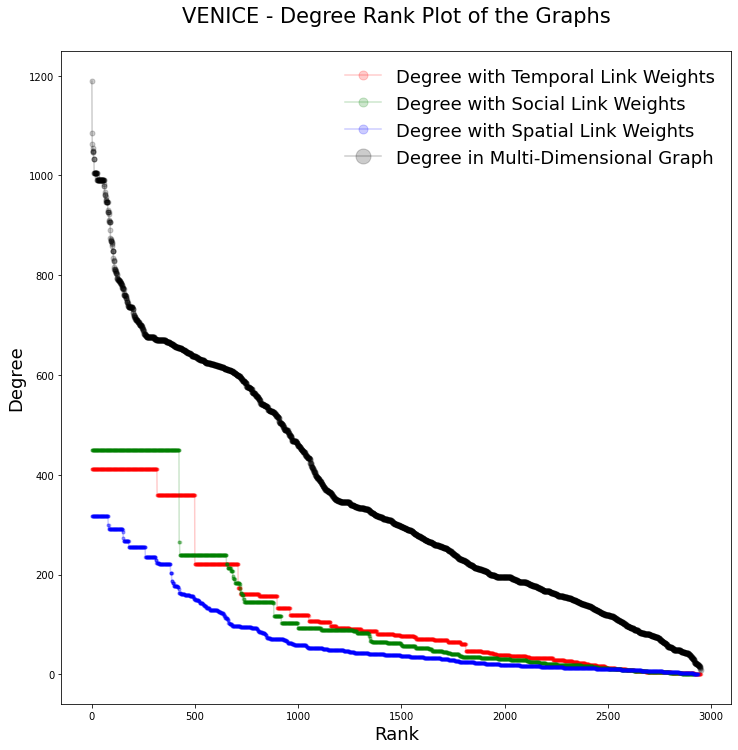

In [262]:
fig = plt.figure("Degree of a random graph", figsize=(12, 12))
ax = fig.add_subplot()
degree_sequence_1 = sorted((d for n, d in G1.degree(weight='Temporal_Similarity')), reverse=True)
degree_sequence_2 = sorted((d for n, d in G2.degree(weight='Social_Similarity')), reverse=True)
degree_sequence_3 = sorted((d for n, d in G3.degree(weight='Spatial_Similarity')), reverse=True)
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

dmax = max(degree_sequence_1+degree_sequence_2+degree_sequence_3)
plt.plot(degree_sequence_1, "r-", alpha=0.2, marker="o", markersize=3, label='Degree with Temporal Link Weights')
plt.plot(degree_sequence_2, "g-", alpha=0.2, marker="o", markersize=3, label='Degree with Social Link Weights')
plt.plot(degree_sequence_3, "b-", alpha=0.2, marker="o", markersize=3, label='Degree with Spatial Link Weights')
plt.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=5, label='Degree in Multi-Dimensional Graph')

ax.set_title("VENICE - Degree Rank Plot of the Graphs\n",size=21)
ax.set_ylabel("Degree",size=18)
ax.set_xlabel("Rank",size=18)

ax.legend(fontsize=18, markerscale=3,frameon=False)

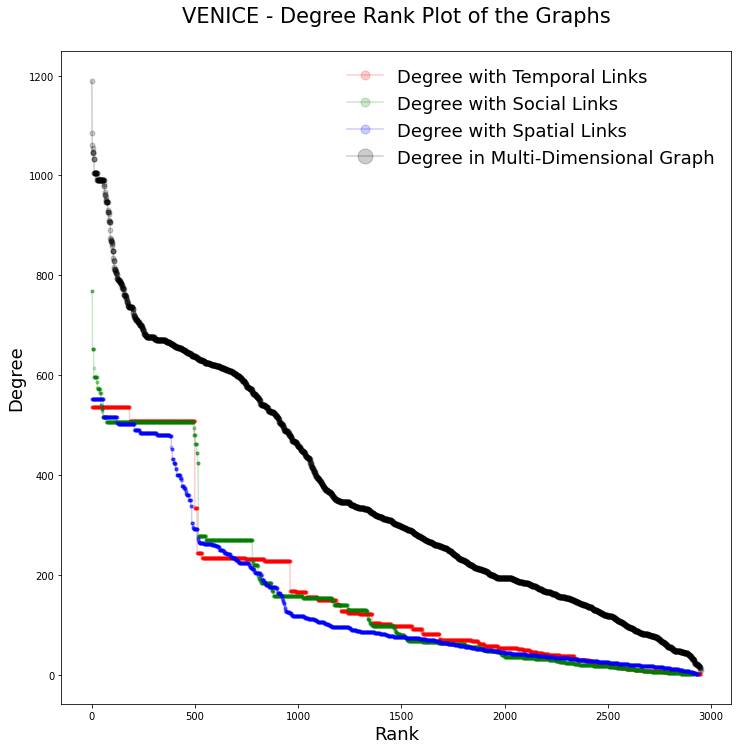

In [263]:
fig = plt.figure("Degree of a random graph", figsize=(12, 12))
ax = fig.add_subplot()
degree_sequence_1 = sorted((d for n, d in G1.degree()), reverse=True)
degree_sequence_2 = sorted((d for n, d in G2.degree()), reverse=True)
degree_sequence_3 = sorted((d for n, d in G3.degree()), reverse=True)
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

dmax = max(degree_sequence_1+degree_sequence_2+degree_sequence_3)
plt.plot(degree_sequence_1, "r-", alpha=0.2, marker="o", markersize=3, label='Degree with Temporal Links')
plt.plot(degree_sequence_2, "g-", alpha=0.2, marker="o", markersize=3, label='Degree with Social Links')
plt.plot(degree_sequence_3, "b-", alpha=0.2, marker="o", markersize=3, label='Degree with Spatial Links')
plt.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=5, label='Degree in Multi-Dimensional Graph')

ax.set_title("VENICE - Degree Rank Plot of the Graphs\n",size=21)
ax.set_ylabel("Degree",size=18)
ax.set_xlabel("Rank",size=18)

ax.legend(fontsize=18, markerscale=3,frameon=False)

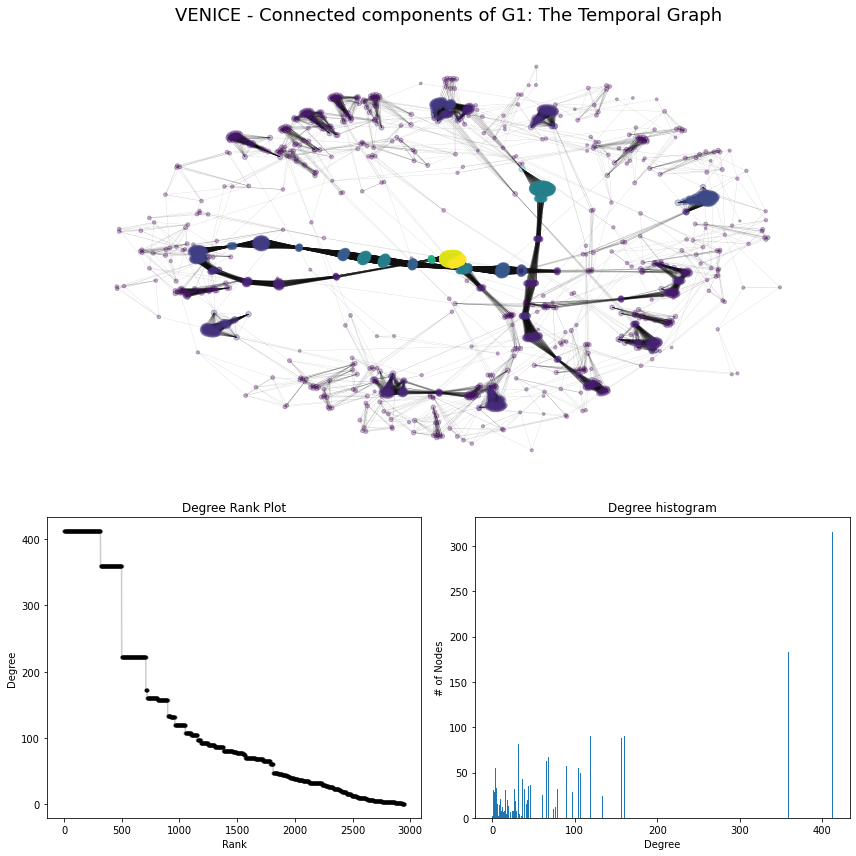

In [917]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G1.degree(weight='Temporal_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G1.subgraph(sorted(nx.connected_components(G1), key=len, reverse=True)[0])
Gcc = G1
pos_2 = nx.spring_layout(G1, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Temporal_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("VENICE - Connected components of G1: The Temporal Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

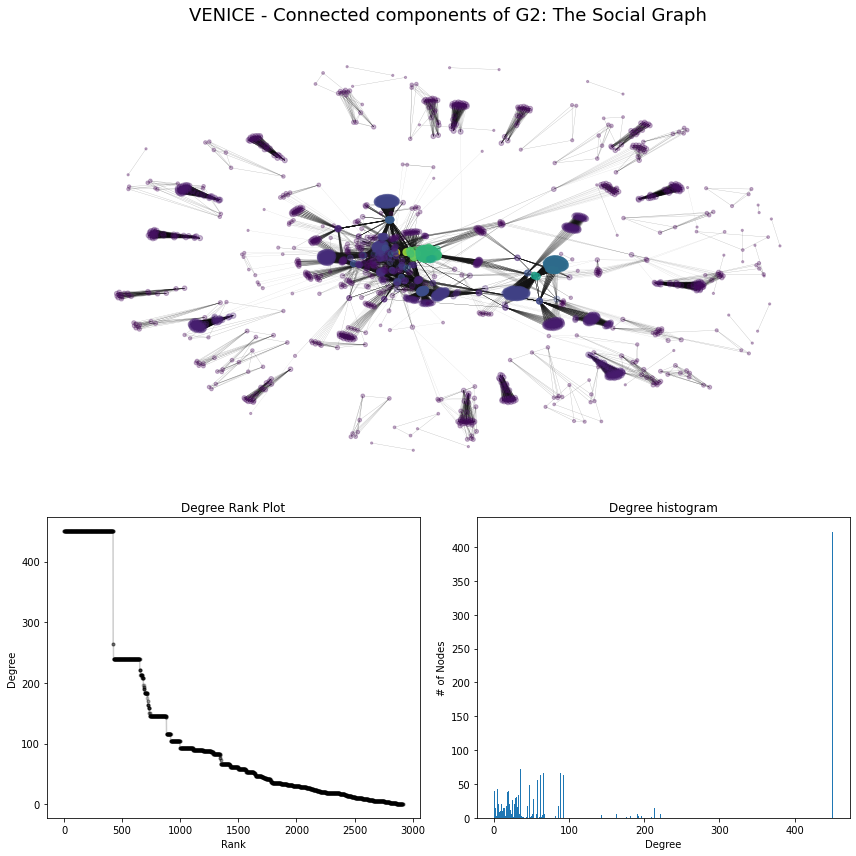

In [918]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G2.degree(weight='Social_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G2.subgraph(sorted(nx.connected_components(G2), key=len, reverse=True)[0])
Gcc = G2
pos_2 = nx.spring_layout(G2, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Social_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("VENICE - Connected components of G2: The Social Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

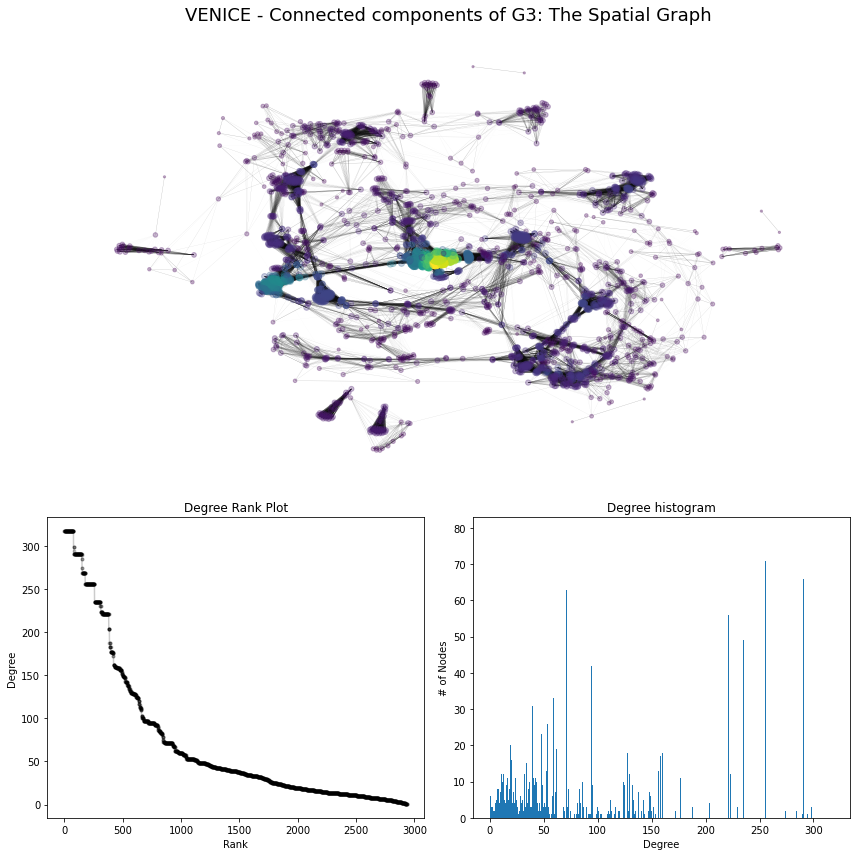

In [919]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G3.degree(weight='Spatial_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G3.subgraph(sorted(nx.connected_components(G3), key=len, reverse=True)[0])
Gcc = G3
pos_2 = nx.spring_layout(G3, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Spatial_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("VENICE - Connected components of G3: The Spatial Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [751]:
GM = nx.MultiGraph()

In [752]:
GM.add_weighted_edges_from([e for e in G1.edges(data=True)])
GM.add_weighted_edges_from([e for e in G2.edges(data=True)])
GM.add_weighted_edges_from([e for e in G3.edges(data=True)])

In [755]:
len(GM[51337278527][51339226541])

2

In [921]:
G = nx.compose_all([G1,G2,G3])

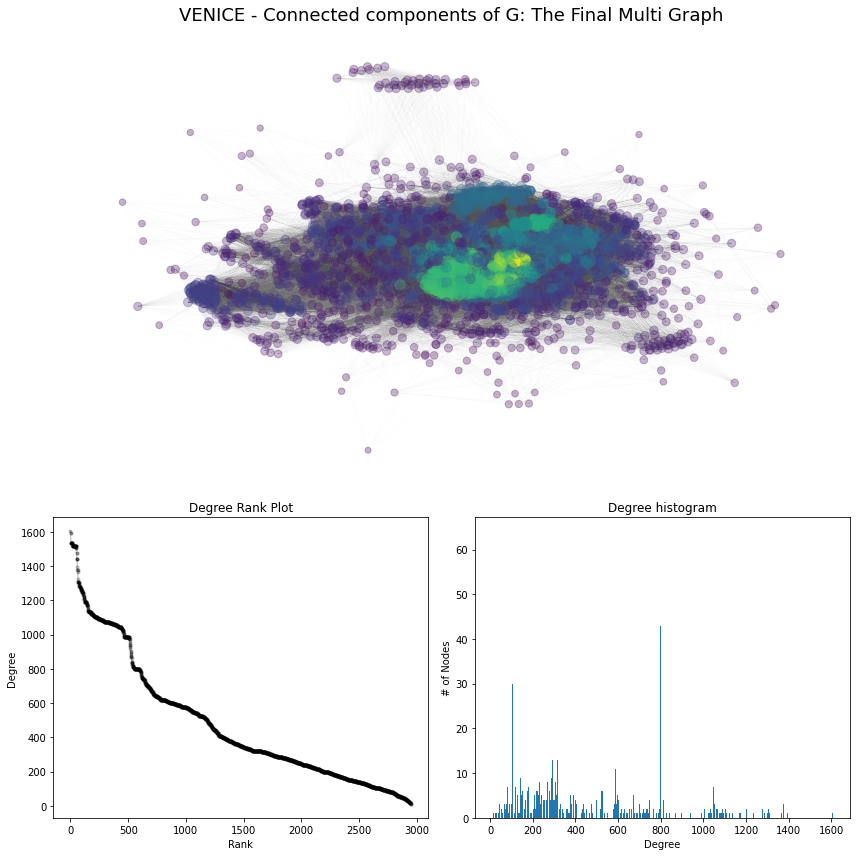

In [923]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in GM.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = GM.subgraph(sorted(nx.connected_components(GM), key=len, reverse=True)[0])
Gcc = GM
pos_2 = nx.spring_layout(G, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[15*np.log(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.03, width = [0.1*len(e) for e in Gcc.edges(data=True)])
ax0.set_title("VENICE - Connected components of G: The Final Multi Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [812]:
len(GM.nodes)

2951

In [813]:
len(GM.edges)

713119

In [814]:
nx.density(GM)

0.1638327714247971

In [764]:
nx.is_connected(GM)

True

In [817]:
nx.is_weighted(GM)

True

In [819]:
nx.is_weighted(G2)

False

In [808]:
A1 = nx.adjacency_matrix(G1, weight='Temporal_Similarity')
A2 = nx.adjacency_matrix(G2, weight='Social_Similarity')
A3 = nx.adjacency_matrix(G3, weight='Spatial_Similarity')

In [862]:
E1 = nx.ego_graph(G1, 51337278527)
E2 = nx.ego_graph(G2, 51337278527)
E3 = nx.ego_graph(G3, 51337278527)

In [863]:
E = nx.compose_all([E1,E2,E3])

In [859]:
len(E3.edges)

822

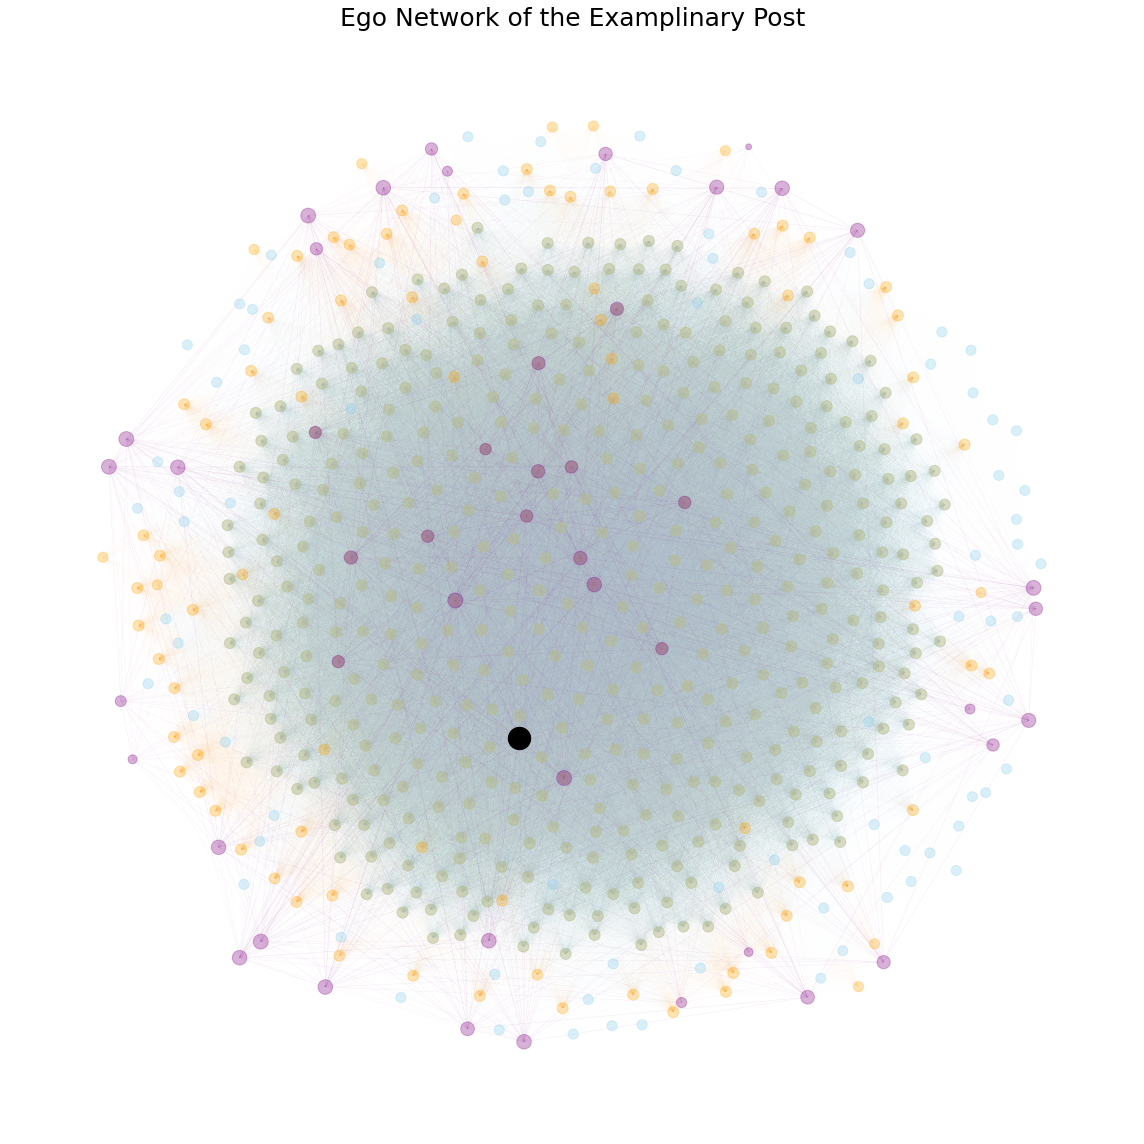

In [901]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in E1.degree(weight='Temporal_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(16, 16))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[:, :])
#Gcc = E1.subgraph(sorted(nx.connected_components(E), key=len, reverse=True)[0])
Gcc = E1
pos_2 = nx.spring_layout(E, seed=10396953, k=3)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[20*np.log(Gcc.degree(v,weight='Temporal_Similarity')) for v in Gcc], 
                       node_color='orange', alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.03, width = [np.log10(e[2]['Temporal_Similarity']+1) for e in Gcc.edges(data=True)], edge_color='darkorange')

nx.draw_networkx_nodes(E2, pos_2, ax=ax0, node_size=[20*np.log(E2.degree(v,weight='Social_Similarity')) for v in E2], 
                       node_color='skyblue', alpha=0.3)
nx.draw_networkx_edges(E2, pos_2, ax=ax0, alpha=0.03, width = [np.log10(e[2]['Social_Similarity']+1) for e in E2.edges(data=True)], edge_color='skyblue')

nx.draw_networkx_nodes(E3, pos_2, ax=ax0, node_size=[10*E3.degree(v,weight='Spatial_Similarity') for v in E3], 
                       node_color='purple', alpha=0.3)
nx.draw_networkx_edges(E3, pos_2, ax=ax0, alpha=0.15, width = [np.log10(e[2]['Spatial_Similarity']+1) for e in E3.edges(data=True)], edge_color='purple')


options = {"node_size": 500, "node_color": "k"}
nx.draw_networkx_nodes(Gcc, pos_2, nodelist=[51337278527], **options)

ax0.set_title("Ego Network of the Examplinary Post",size=25)
ax0.set_axis_off()

fig.tight_layout()
plt.show()